In [2]:
!pip install opencv-python tensorflow


In [3]:
import cv2
import base64
import numpy as np
from PIL import Image
import io
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow

<IPython.core.display.Javascript object>

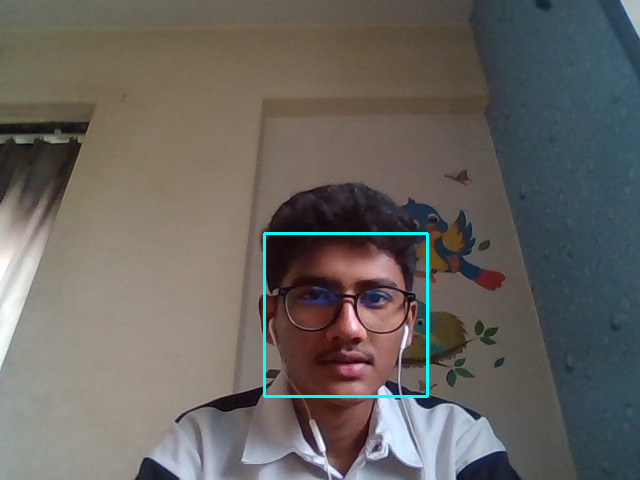

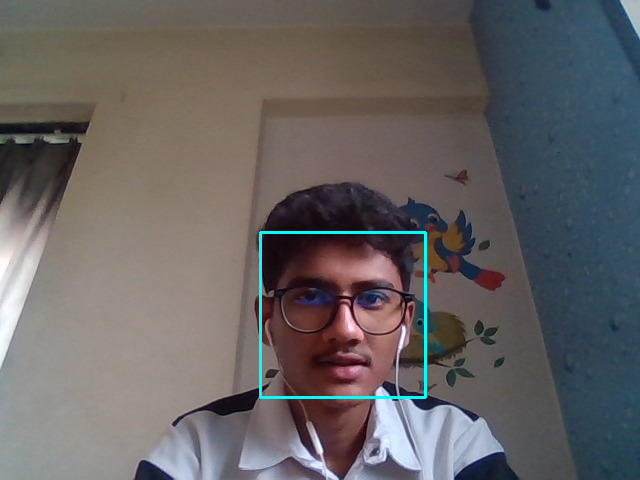

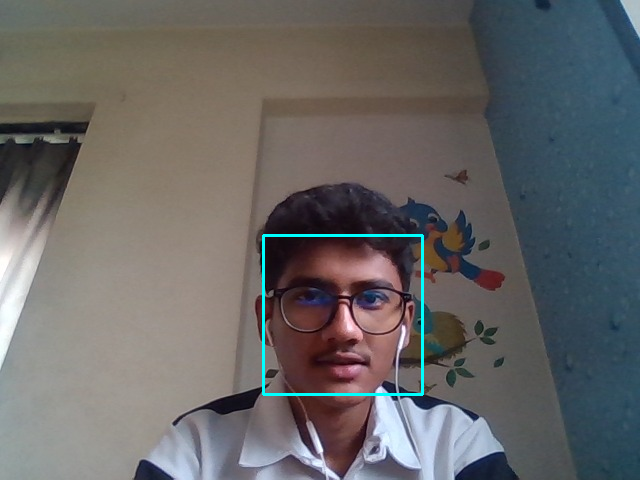

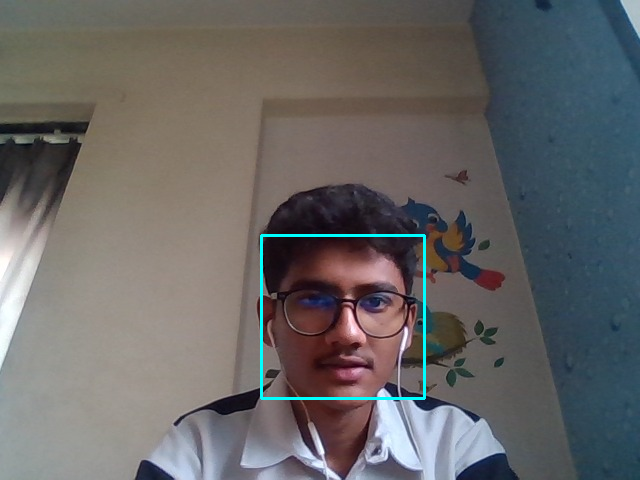

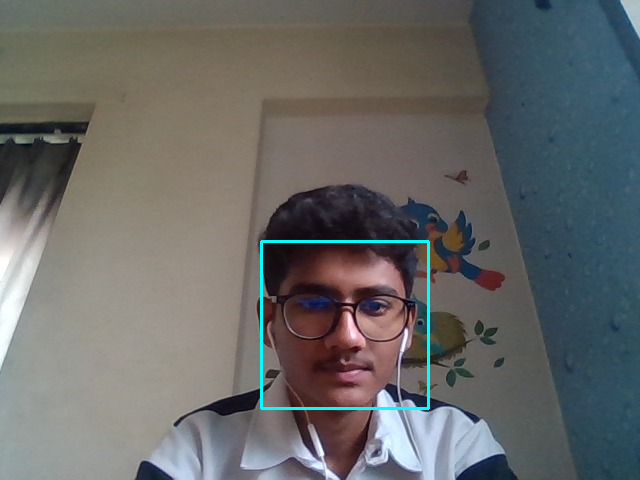

In [21]:
js_code = '''
async function takePhoto() {
    const video = document.createElement('video');
    document.body.appendChild(video);
    const stream = await navigator.mediaDevices.getUserMedia({video: true});
    video.srcObject = stream;
    await new Promise((resolve) => video.onloadedmetadata = resolve);
    video.play();

    // Take photo
    const canvas = document.createElement('canvas');
    canvas.width = video.videoWidth;
    canvas.height = video.videoHeight;
    const context = canvas.getContext('2d');
    context.drawImage(video, 0, 0, canvas.width, canvas.height);
    const img = canvas.toDataURL('image/jpeg');

    stream.getTracks().forEach(track => track.stop()); // stop webcam
    video.remove(); // remove video element
    return img;
}
'''
display(Javascript(js_code))

def js_to_image(js_reply):
    """Convert JS captured image to OpenCV format"""
    image_bytes = base64.b64decode(js_reply.split(',')[1])
    image_PIL = Image.open(io.BytesIO(image_bytes))
    image_np = np.array(image_PIL)
    frame = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
    return frame

# Load face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Capture and process frames
for i in range(5):  # capture 5 frames (change as needed)
    js_reply = eval_js('takePhoto()')
    frame = js_to_image(js_reply)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 0), 2)

    from google.colab.patches import cv2_imshow
    cv2_imshow(frame)